In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
file_dir = '../output_3/'
model_file = os.listdir(file_dir)
model_file = [i for i in model_file if 'model_result' in i]

In [5]:
df_model_list = []

for file_name in model_file:
    file_location = file_dir + file_name
    ticker_name = file_name.split('_')[0]
    df = pd.read_csv(file_location)
    df.columns = ['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name']

    metrics_name = ['tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse']
    model = ['ridge','rf','gb']
    df['ticker_name'] = ticker_name
    for i in metrics_name:
        df[i + '_rank'] = df.groupby("model_name")[i].rank(ascending=False)
    df_model_list.append(df)
df_model = pd.concat(df_model_list)
df_model = df_model.replace([np.inf, -np.inf], np.nan,)

In [6]:
df_model.columns

Index(['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name', 'ticker_name', 'tuning_sharpe_rank',
       'tuning_rmse_rank', 'tuning_spearmanr_rank', 'cagr_rank',
       'train_sharpe_ratio_rank', 'calmar_rank', 'test_spearmanr_rank',
       'test_sharpe_rank', 'test_rmse_rank'],
      dtype='object')

In [7]:
df_model[ (df_model['col'].isin(['base','RSI_20','RSI_20_ta','RSI_25','RSI_25_ta'])) & (df_model['ticker_name'] == 'BA') & (df_model['model_name'] == 'ridge')]

,col,tuning_sharpe,tuning_rmse,tuning_spearmanr,cagr,train_sharpe_ratio,calmar,test_spearmanr,test_sharpe,test_rmse,...,ticker_name,tuning_sharpe_rank,tuning_rmse_rank,tuning_spearmanr_rank,cagr_rank,train_sharpe_ratio_rank,calmar_rank,test_spearmanr_rank,test_sharpe_rank,test_rmse_rank
0,base,0.226956,-0.015068,0.005851,0.269099,1.100045,0.729658,0.035699,-0.035018,0.001307,...,BA,14.0,15.0,17.0,16.0,16.0,18.0,12.0,1.0,13.0
1,RSI_20,0.702072,-0.014984,0.049713,0.564347,1.967957,2.468977,0.073731,NaN,0.001303,...,BA,1.0,8.0,8.0,7.0,7.0,7.0,8.0,NaN,16.0
2,RSI_20_ta,0.525983,-0.015054,0.006820,0.279695,1.134126,0.936254,0.016325,NaN,0.001314,...,BA,5.0,11.0,14.0,14.0,14.0,15.0,19.0,NaN,5.0
3,RSI_25,0.666971,-0.015009,0.035191,0.488410,1.760386,2.166182,0.059080,NaN,0.001305,...,BA,2.0,9.0,9.0,8.0,8.0,8.0,9.0,NaN,15.0
4,RSI_25_ta,0.474202,-0.015064,0.006781,0.267589,1.094887,0.774655,0.019284,NaN,0.001310,...,BA,7.0,12.0,15.0,17.0,17.0,17.0,18.0,NaN,7.0


# CAGR basemodel VS other models

In [8]:
indicator_list = list(set(df_model['col']))
print(len(indicator_list))
col = sns.color_palette("husl", len(indicator_list)).as_hex()
col = pd.DataFrame( {'col':indicator_list, 'color':col})
col.loc[(col['col'] == 'base'),'color'] = 'black'

19


In [9]:

def plot_model_vs_baseline(df_model, key = 'test_rmse', color_df = col ,ascending = False):

    df_model_ridge = df_model[df_model['model_name'] == 'ridge']
    df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
    df_model_ridge = df_model_ridge.merge(color_df, on = 'col')
    df_model_ridge = df_model_ridge.sort_values([key], ascending= ascending)

    df_model_rf = df_model[df_model['model_name'] == 'rf']
    df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
    df_model_rf = df_model_rf.merge(color_df, on = 'col')
    df_model_rf = df_model_rf.sort_values([key], ascending= ascending)

    df_model_gbm = df_model[df_model['model_name'] == 'gb']
    df_model_gbm = df_model_ridge.groupby(['col']).mean().reset_index()
    df_model_gbm = df_model_gbm.merge(color_df, on = 'col')
    df_model_gbm = df_model_gbm.sort_values([key], ascending= ascending)

    df_model_all = df_model.groupby(['col']).mean().reset_index()
    df_model_all = df_model_all.merge(color_df, on = 'col')
    df_model_all = df_model_all.sort_values([key], ascending= ascending)

    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(18.5, 10.5)
    if('train' in key): title_key = key.replace('train_','')
    else: title_key = key
    fig.suptitle(f'Model {title_key} with baseline model')

    axs[0,0].barh(df_model_ridge['col'], df_model_ridge[key], color=df_model_ridge['color'])
    axs[0,0].title.set_text('Ridge')
    axs[0,1].barh(df_model_rf['col'], df_model_rf[key], color=df_model_rf['color'])
    axs[0,1].title.set_text('Random Forest')
    axs[1,0].barh(df_model_gbm['col'], df_model_gbm[key], color=df_model_gbm['color'])
    axs[1,0].title.set_text('GBM')

    axs[1,1].barh(df_model_all['col'], df_model_all[key], color=df_model_all['color'])
    axs[1,1].title.set_text('All')

/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

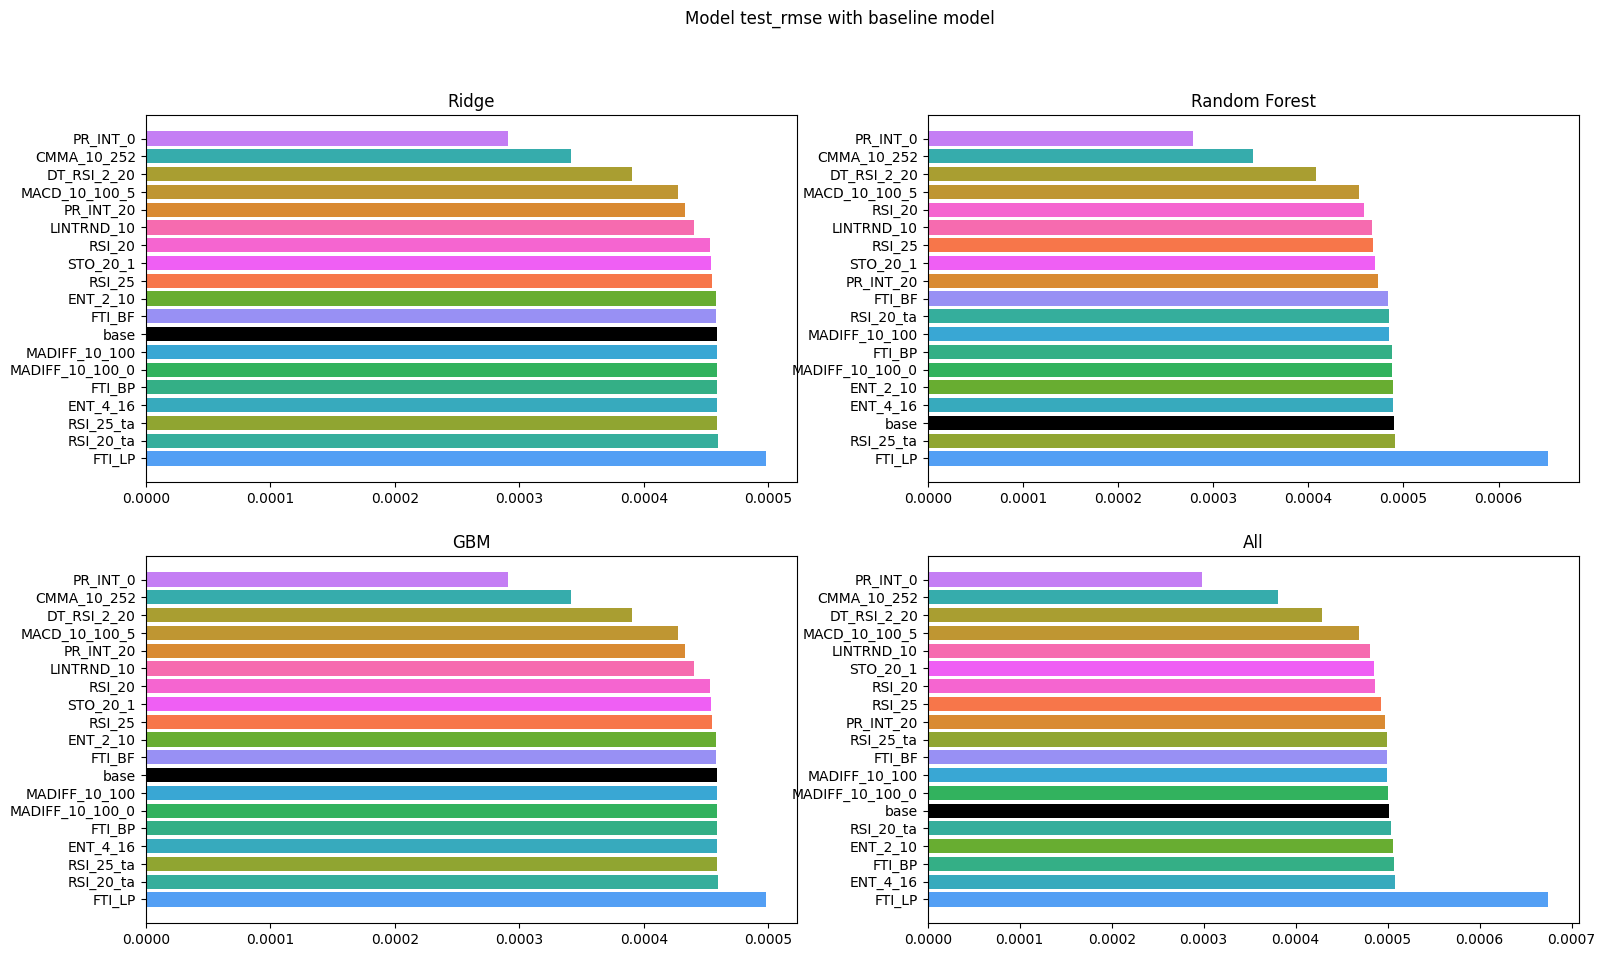

In [11]:
plot_model_vs_baseline(df_model, key = 'test_rmse')
# plt.savefig('../imgs/model_baseline_rmse.png')

/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

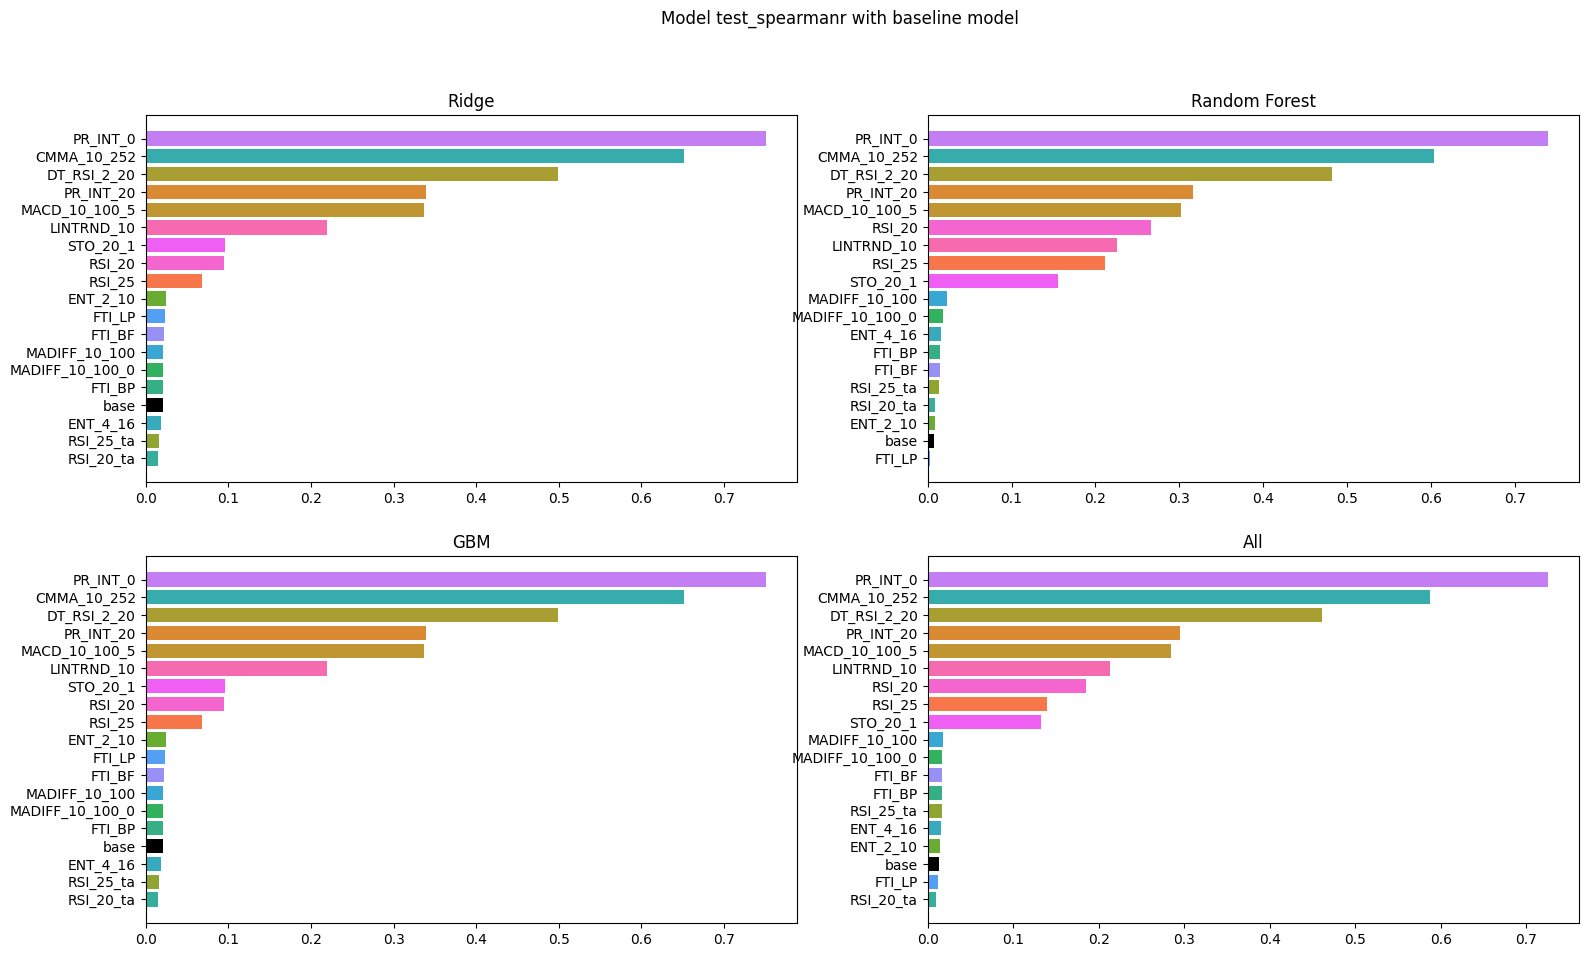

In [13]:
plot_model_vs_baseline(df_model, key = 'test_spearmanr',ascending=True)
# plt.savefig('../imgs/model_baseline_spearmanr.png')

/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

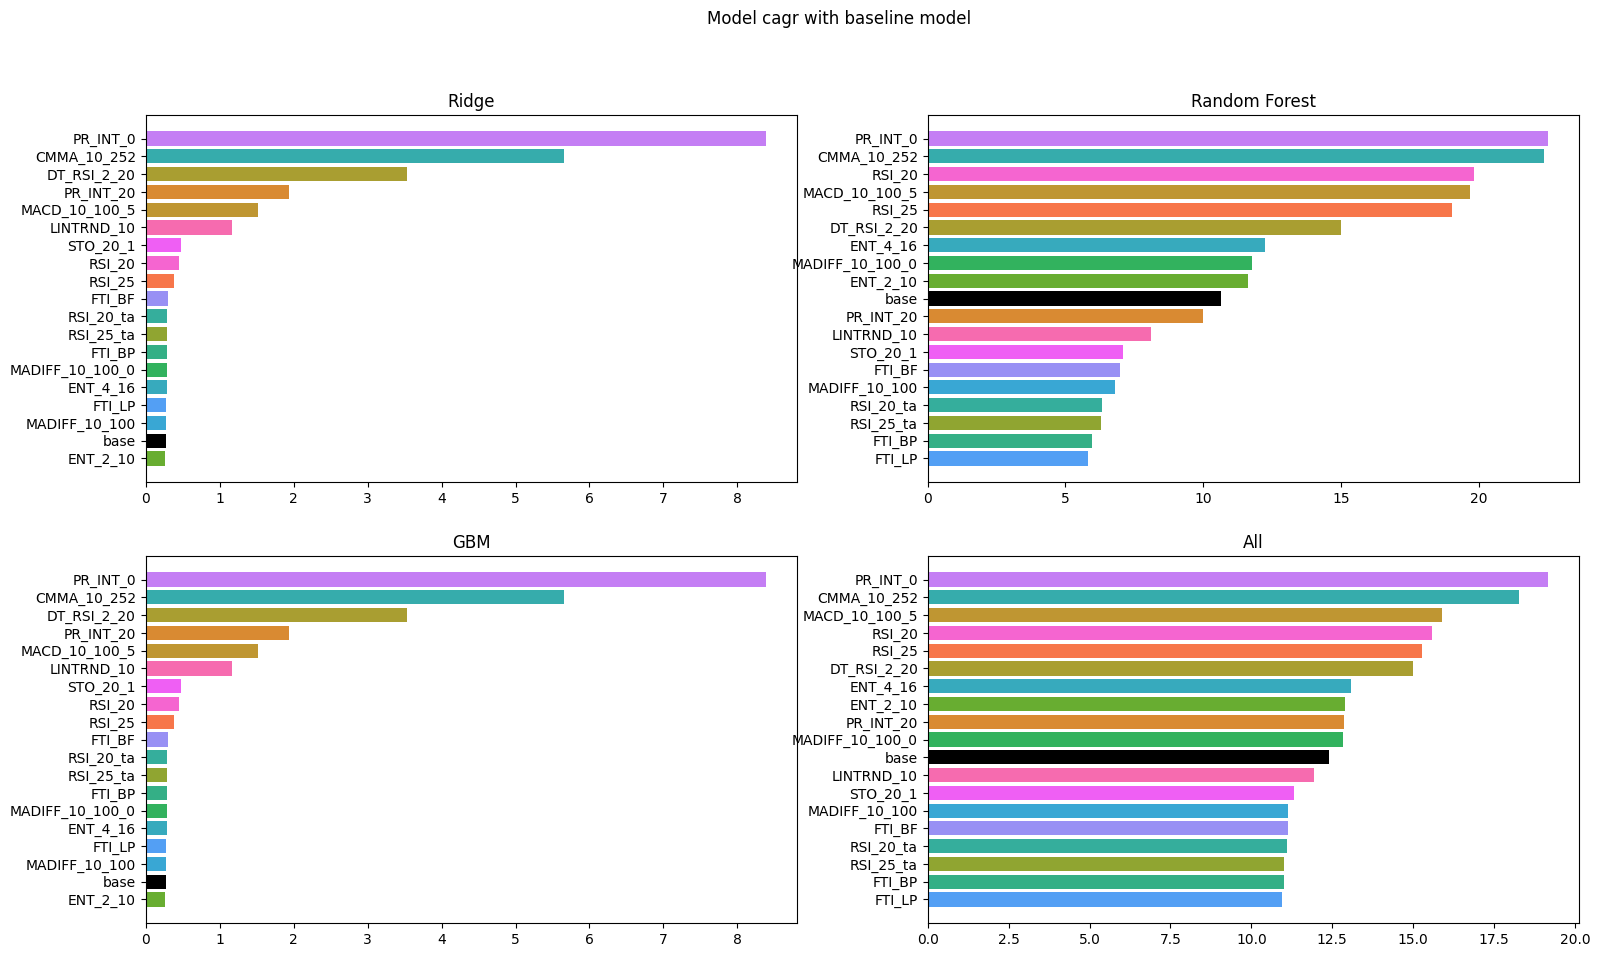

In [15]:
plot_model_vs_baseline(df_model, key = 'cagr',ascending=True)
# plt.savefig('../imgs/model_baseline_cagr.png')

In [172]:
df_model.columns

Index(['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name', 'ticker_name', 'tuning_sharpe_rank',
       'tuning_rmse_rank', 'tuning_spearmanr_rank', 'cagr_rank',
       'train_sharpe_ratio_rank', 'calmar_rank', 'test_spearmanr_rank',
       'test_sharpe_rank', 'test_rmse_rank'],
      dtype='object')

# Timothy VS Talibs

/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

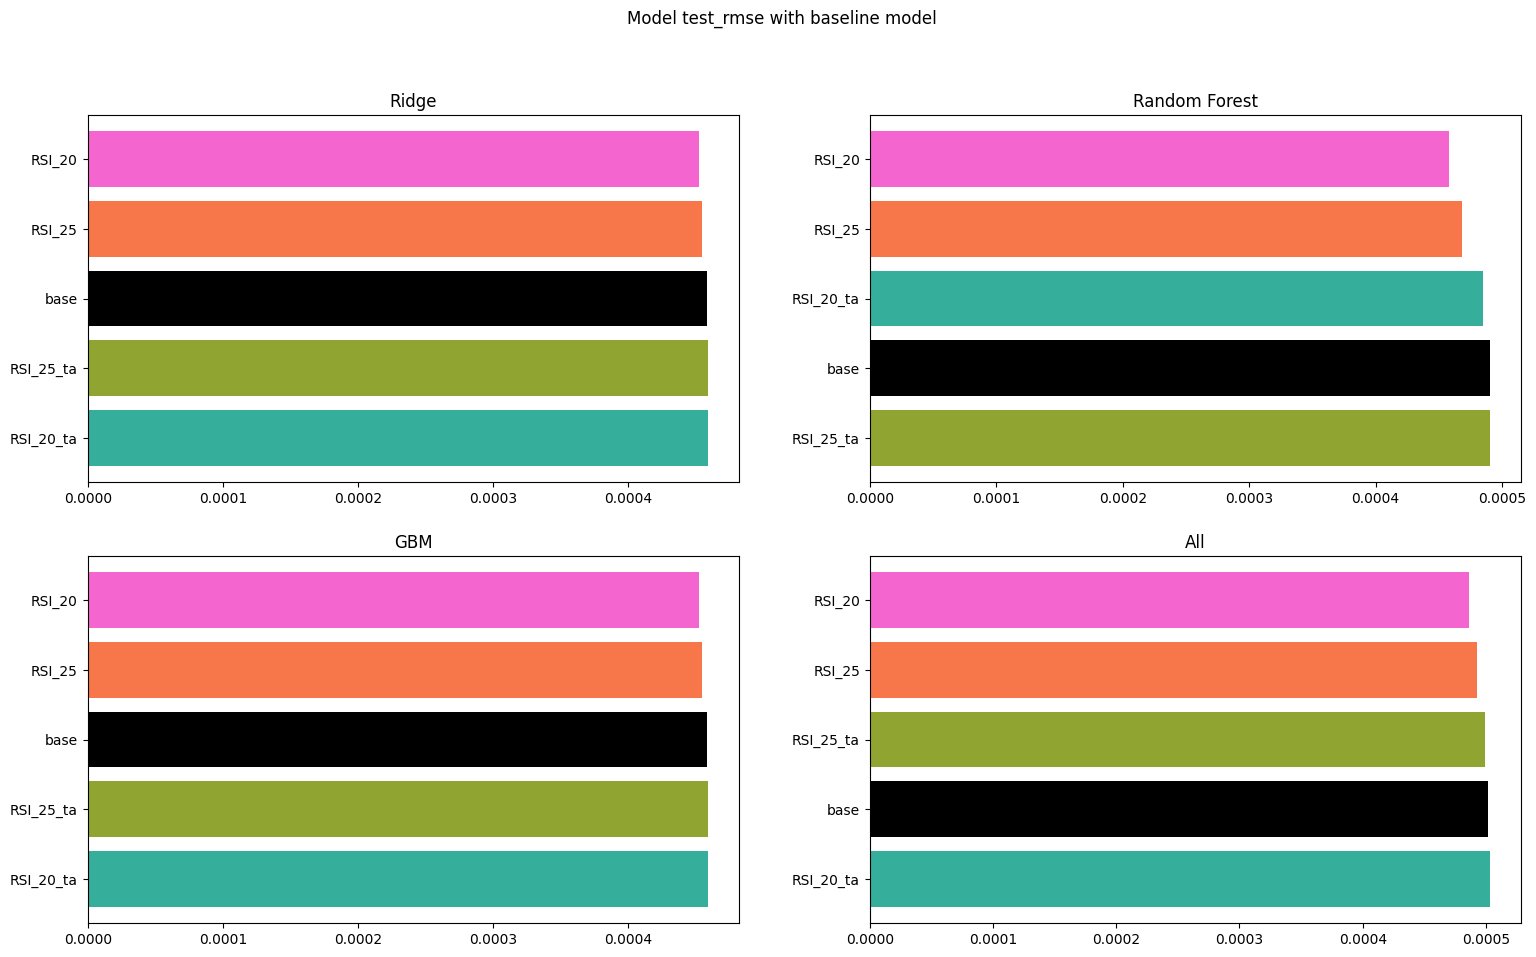

In [17]:
df_rsi = df_model[df_model['col'].isin(['base','RSI_20','RSI_25','RSI_20_ta','RSI_25_ta'])]
plot_model_vs_baseline(df_rsi, key = 'test_rmse')
# plt.savefig('../imgs/model_rsi_rmse.png')

In [18]:
df_model[df_model['ticker_name'] == 'OEX']

,col,tuning_sharpe,tuning_rmse,tuning_spearmanr,cagr,train_sharpe_ratio,calmar,test_spearmanr,test_sharpe,test_rmse,...,ticker_name,tuning_sharpe_rank,tuning_rmse_rank,tuning_spearmanr_rank,cagr_rank,train_sharpe_ratio_rank,calmar_rank,test_spearmanr_rank,test_sharpe_rank,test_rmse_rank
0,base,0.731787,-0.008642,0.016123,0.137482,0.985178,0.762756,-0.027862,0.135052,0.000123,...,OEX,1.0,10.0,12.0,16.0,16.0,14.0,14.0,1.0,9.0
1,RSI_20,0.516366,-0.008580,0.079149,0.307382,1.984911,1.535896,0.039182,NaN,0.000121,...,OEX,9.0,8.0,7.0,8.0,8.0,7.0,7.0,NaN,14.0
2,RSI_20_ta,0.502694,-0.008645,0.008238,0.134569,0.966897,0.693549,-0.041839,NaN,0.000123,...,OEX,10.0,13.0,19.0,18.0,18.0,19.0,19.0,NaN,2.0
3,RSI_25,0.585529,-0.008602,0.056403,0.254498,1.686466,1.271653,0.014134,NaN,0.000122,...,OEX,3.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,13.0
4,RSI_25_ta,0.582568,-0.008643,0.011092,0.140823,1.006081,0.725781,-0.036890,NaN,0.000123,...,OEX,4.0,11.0,18.0,14.0,14.0,17.0,18.0,NaN,3.0
5,DT_RSI_2_20,-0.101250,-0.007470,0.621294,1.625598,7.675616,9.841751,0.485152,NaN,0.000099,...,OEX,15.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,17.0
6,STO_20_1,0.544387,-0.008579,0.069701,0.317972,2.043457,1.494645,0.038235,NaN,0.000122,...,OEX,7.0,7.0,8.0,7.0,7.0,8.0,8.0,NaN,12.0
7,MADIFF_10_100_0,0.478363,-0.008649,0.017262,0.160261,1.126614,0.889136,-0.023064,NaN,0.000122,...,OEX,12.0,17.0,10.0,10.0,10.0,10.0,11.0,NaN,10.0
8,MADIFF_10_100,0.478750,-0.008648,0.016964,0.152731,1.080146,0.781285,-0.021893,NaN,0.000122,...,OEX,11.0,16.0,11.0,11.0,11.0,12.0,10.0,NaN,11.0
9,MACD_10_100_5,-0.750658,-0.007997,0.321696,1.011939,5.295889,4.060794,0.361316,NaN,0.000109,...,OEX,19.0,5.0,5.0,5.0,5.0,5.0,4.0,NaN,16.0


/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_60447/3151539399.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

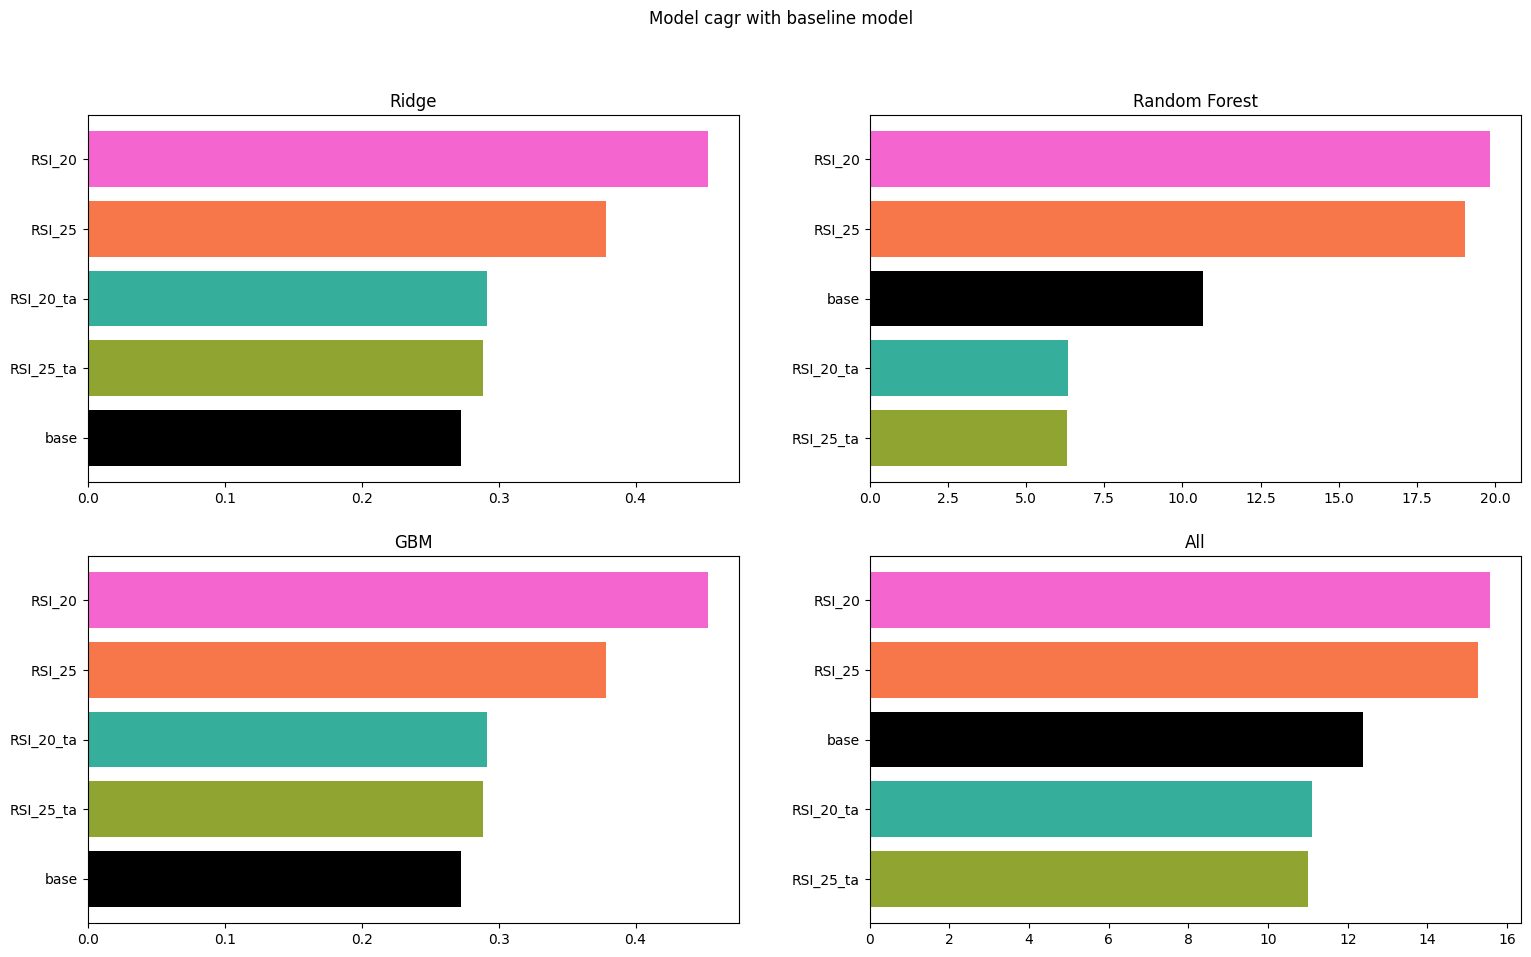

In [20]:
plot_model_vs_baseline(df_rsi, key = 'cagr', ascending=True)
# plt.savefig('../imgs/model_rsi_cagr.png')

In [21]:
df_3model = df_model.groupby(['model_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
df_3model

,test_rmse,test_sharpe,test_spearmanr,cagr
model_name,,,,
gb,0.000552,0.185559,0.149235,26.531731
ridge,0.000438,0.268788,0.171447,1.386220
rf,0.000466,0.332970,0.180510,12.008547


### Comparing tickers

In [22]:
df_ticker = df_model.groupby(['ticker_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
df_ticker[df_ticker['test_sharpe'] > 0]

,test_rmse,test_sharpe,test_spearmanr,cagr
ticker_name,,,,
RUT,0.000255,0.043184,0.244727,4.406812
BAC,0.000659,0.092401,0.146929,19.679290
DIS,0.000623,0.107883,0.127887,4.895465
DJI,0.000146,0.127097,0.180644,2.054986
TLT,0.000102,0.207405,0.115181,2.200746
IBM,0.000290,0.210628,0.135763,4.233142
WMT,0.000205,0.241061,0.188719,3.335411
CAT,0.000438,0.262389,0.141602,12.791796
NKE,0.000447,0.301910,0.184020,6.843044


In [67]:
df_ticker = df_model.groupby(['ticker_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
list_tickers = ['BA','RUT','TSLA']
df_ticker_selected = df_ticker[df_ticker.index.isin(list_tickers)]

In [69]:
df_ticker_selected.sort_values(['test_sharpe'])

,test_rmse,test_sharpe,test_spearmanr,cagr
ticker_name,,,,
BA,0.001428,-0.095672,0.124814,7.965746
RUT,0.000255,0.043184,0.244727,4.406812
TSLA,0.002197,0.872364,0.147286,128.380852


In [74]:
df_ticker_ind = df_model.groupby(['ticker_name','col'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe']).reset_index()
list_tickers = ['BA','BAC','RUT','TLT','TSLA']
df_ticker_ind = df_ticker_ind[df_ticker_ind['ticker_name'].isin(list_tickers)]

In [33]:
evaluation_list = [
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'RSI_20_ta', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'FTI_BF', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'RSI_20_ta', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'PR_INT_20', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'ENT_4_16', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'RSI_25', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'MADIFF_10_100', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'CMMA_10_252', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'PR_INT_20', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'ENT_2_10', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'MADIFF_10_100_0', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'STO_20_1', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'PR_INT_20', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'LINTRND_10', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'RSI_20', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'ENT_4_16', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'PR_INT_0', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'BAC'},
    {'col': 'LINTRND_10', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'RSI_20', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'ENT_4_16', 'model_name': 'gb', 'ticker_name': 'BAC'},
    {'col': 'PR_INT_0', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'BAC'}
    ]

In [34]:
xx = [ df_model[(df_model[list(i)] == pd.Series(i)).all(axis=1)]  for i in evaluation_list]

df_shap = pd.concat(xx)[['col','model_name','ticker_name','test_rmse','test_spearmanr','cagr']].sort_values(['cagr'])


In [46]:
import antropy as ant


In [64]:

def calc_entropy(one_ticker, one_model, indicator_list):

    ticker_data =  pd.read_csv(f'../data/{one_ticker}_full.csv')
    for ind in indicator_list:
        print(f'{ind} has antropy: ', ant.perm_entropy(ticker_data[ind], normalize=True))
    res = df_shap[ (df_shap['model_name'] == one_model) & (df_shap['ticker_name'] == one_ticker)].sort_values('cagr')
    return(res)


In [70]:
one_ticker = 'BA'
one_model = 'ridge'
one_col = ['PR_INT_0','RSI_25']
calc_entropy(one_ticker, one_model, one_col)

PR_INT_0 has antropy:  0.9907371040471289
RSI_25 has antropy:  0.9394603263283937


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
0,base,ridge,BA,0.001307,0.035699,0.269099
3,RSI_25,ridge,BA,0.001305,0.059080,0.488410
11,PR_INT_0,ridge,BA,0.001008,0.725209,5.957554


In [60]:
one_ticker = 'RUT'
one_model = 'rf'
one_col = ['PR_INT_20','ENT_2_10']
calc_entropy(one_ticker, one_model, one_col)

PR_INT_20 has antropy:  0.9522595370146877
ENT_2_10 has antropy:  0.728792127248991


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
33,ENT_2_10,rf,RUT,0.000269,0.064639,1.582036
31,PR_INT_20,rf,RUT,0.000213,0.617668,5.397331
19,base,rf,RUT,0.000275,0.041704,5.679199


In [61]:
one_ticker = 'TSLA'
one_model = 'gb'
one_col = ['DT_RSI_2_20','ENT_4_16']
calc_entropy(one_ticker, one_model, one_col)

DT_RSI_2_20 has antropy:  0.9430318175631063
ENT_4_16 has antropy:  0.8396141107230007


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
38,base,gb,TSLA,0.002553,0.006280,273.569562
43,DT_RSI_2_20,gb,TSLA,0.001918,0.410674,278.419484
53,ENT_4_16,gb,TSLA,0.002960,-0.009943,283.650209


In [1]:
# df_model[ (df_model['ticker_name'] == 'NDX')].sort_values('cagr')[['col','model_name','ticker_name','test_rmse','test_spearmanr','cagr']]#.sort_values(['test_rmse'])

#